['Events;1']
{'Events;1': 'TTree'}
[10.8, 15.7]
[3.28]
[10.8, 15.7]
[10.5, 16.3]
[3.28]
[11.4, 17.6, 9.62, 3.5]
[3.28, 3.64, 32.9, 23.7]
[3.57, 4.57, 4.37]
[57.6, 53]
[11.3, 23.9]
[10.2, 14.2]
[11.5, 3.47]
importing Jupyter notebook from Opening_files.ipynb
['Events;1']
{'Events;1': 'TTree'}
[10.8, 15.7]
[3.28]
[10.8, 15.7]
[10.5, 16.3]
[3.28]
[11.4, 17.6, 9.62, 3.5]
[3.28, 3.64, 32.9, 23.7]
[3.57, 4.57, 4.37]
[57.6, 53]
[11.3, 23.9]
[10.2, 14.2]
[11.5, 3.47]


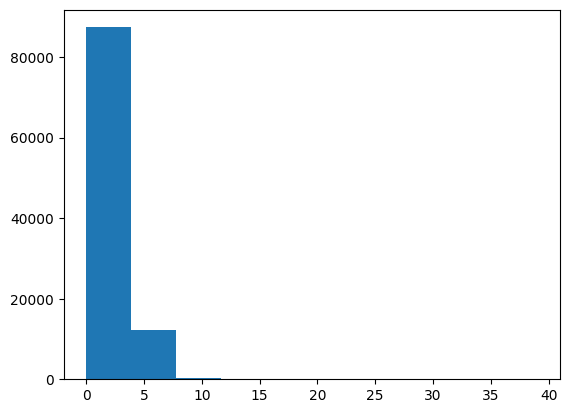

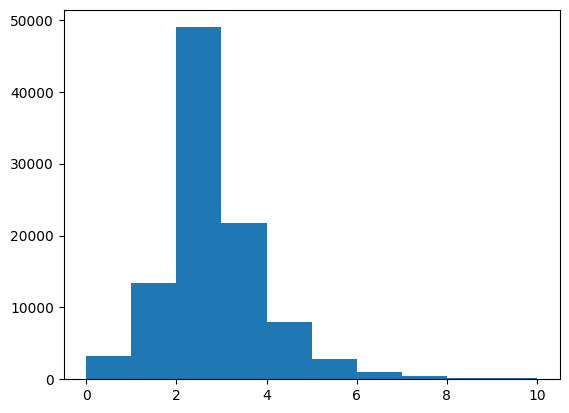

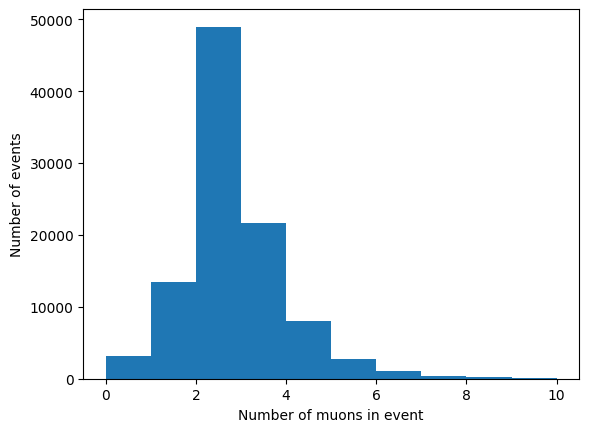

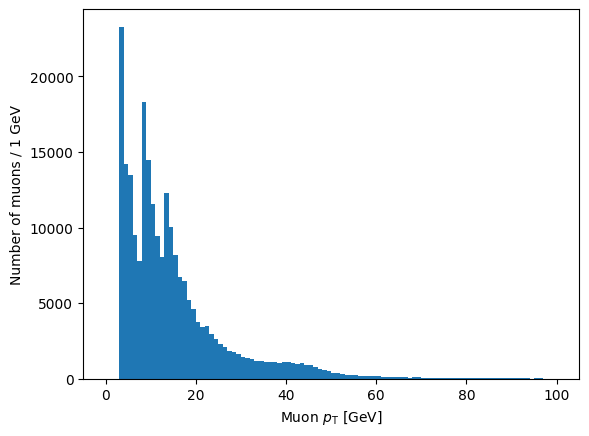

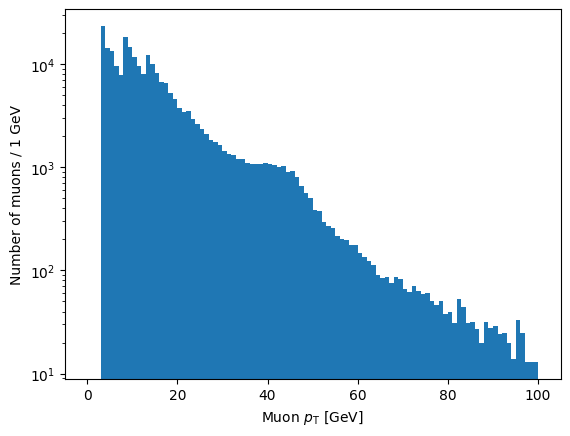

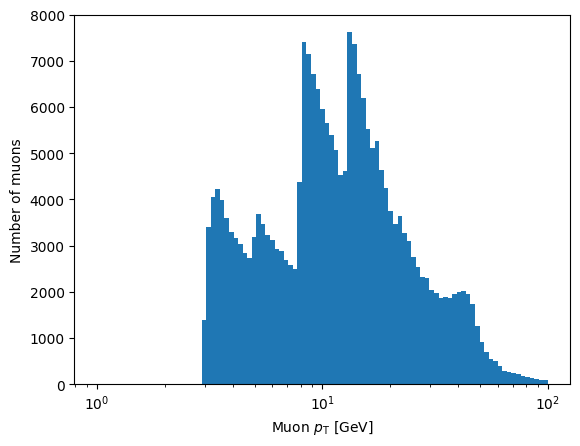

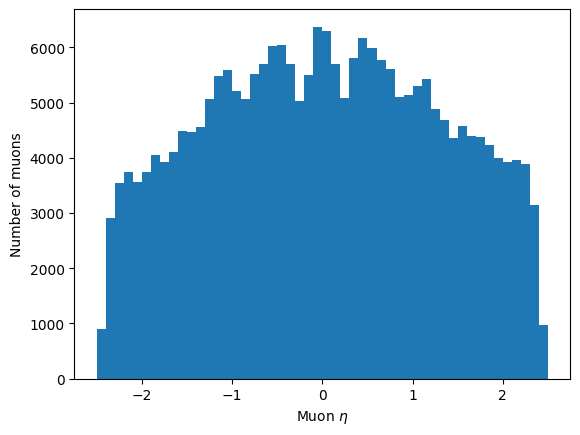

importing Jupyter notebook from Histograms.ipynb
['Events;1']
{'Events;1': 'TTree'}
[10.8, 15.7]
[3.28]
[10.8, 15.7]
[10.5, 16.3]
[3.28]
[11.4, 17.6, 9.62, 3.5]
[3.28, 3.64, 32.9, 23.7]
[3.57, 4.57, 4.37]
[57.6, 53]
[11.3, 23.9]
[10.2, 14.2]
[11.5, 3.47]


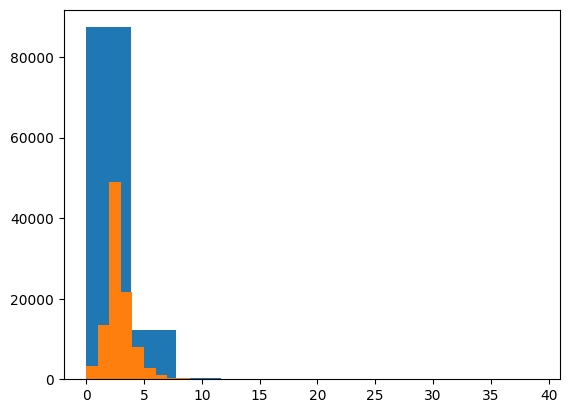

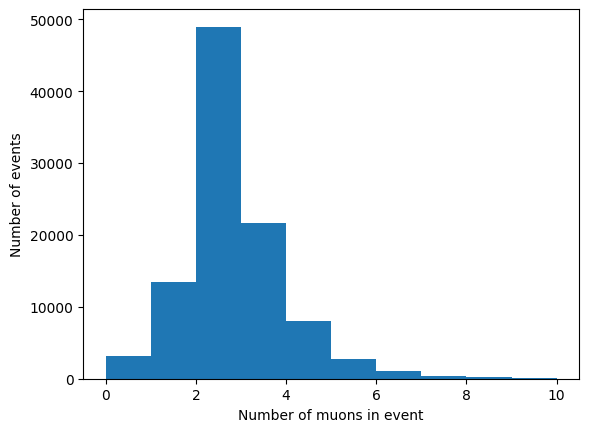

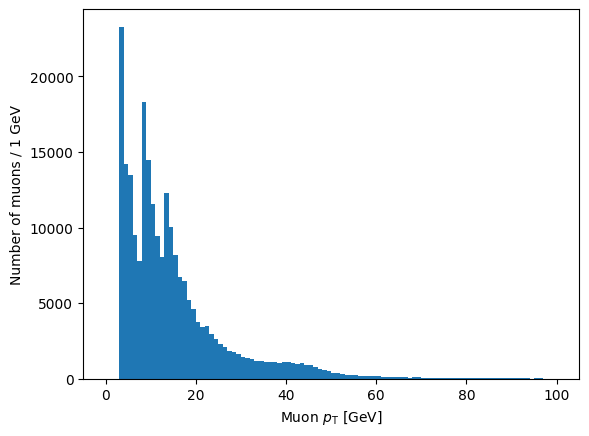

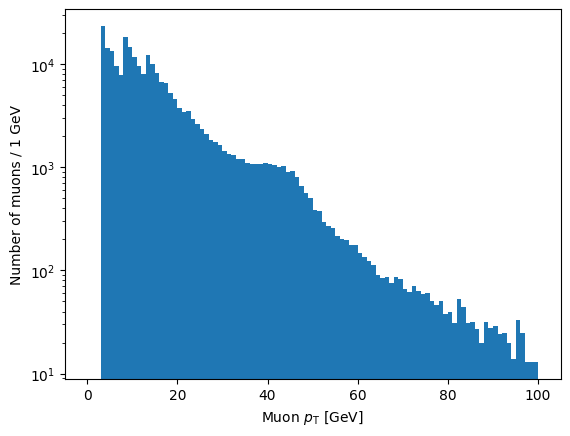

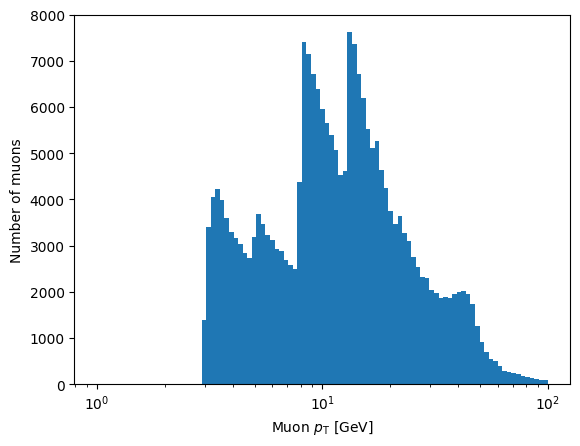

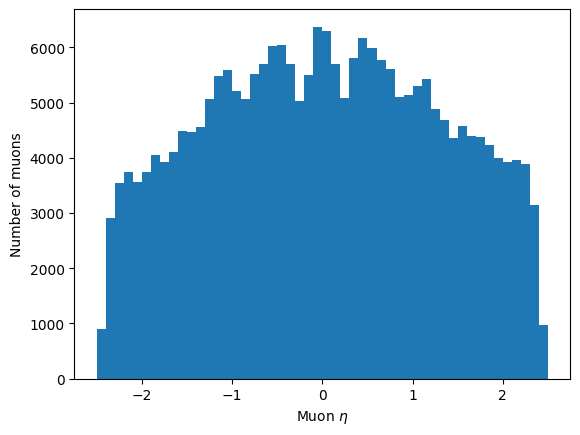

ModuleNotFoundError: No module named 'Histograms.ipynb'; 'Histograms' is not a package

In [2]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak

%run Histograms.ipynb
import import_ipynb
import Histograms.ipynb

In [3]:
len(branches)
len(branches['nMuon'])
len(branches['Muon_pt']) # or any of the other branches...

100000

In [4]:
len(ak.flatten(branches['Muon_pt']))

235286

In [5]:
branches['nMuon'] == 1

<Array [False, False, True, ..., False, False, False] type='100000 * bool'>

In [6]:
single_muon_mask = branches['nMuon'] == 1

In [7]:
np.sum(single_muon_mask)

13447

In [9]:
branches['Muon_pt'][single_muon_mask]
len(branches['Muon_pt'][single_muon_mask])

13447

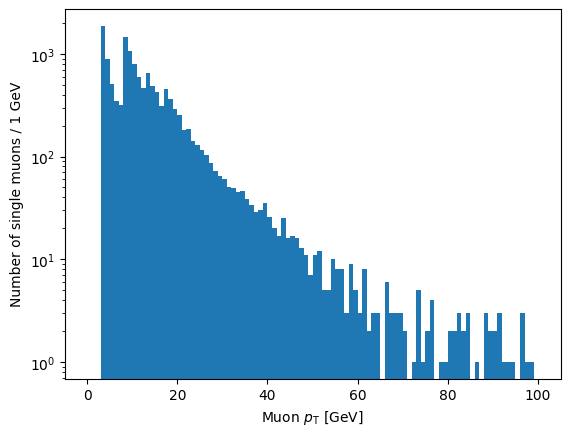

In [10]:
plt.hist(ak.flatten(branches['Muon_pt'][single_muon_mask]), bins=100, range=(0, 100))
plt.xlabel('Muon $p_{\mathrm{T}}$ [GeV]')
plt.ylabel('Number of single muons / 1 GeV')
plt.yscale('log')
plt.show()

In [11]:
eta_mask = abs(branches['Muon_eta']) < 2

In [12]:
eta_mask

<Array [[True, True], ..., [True, True, True]] type='100000 * var * bool'>

In [13]:
np.sum(eta_mask)

204564

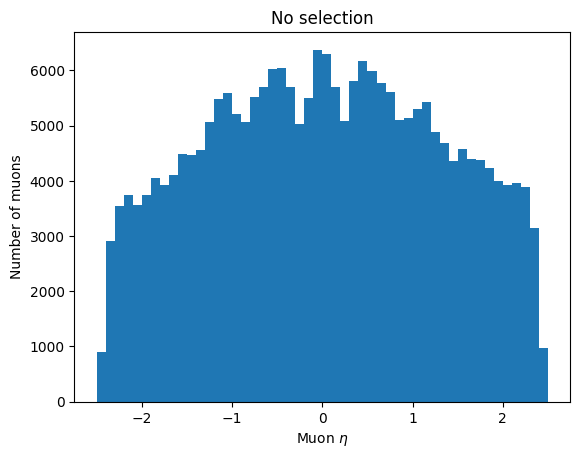

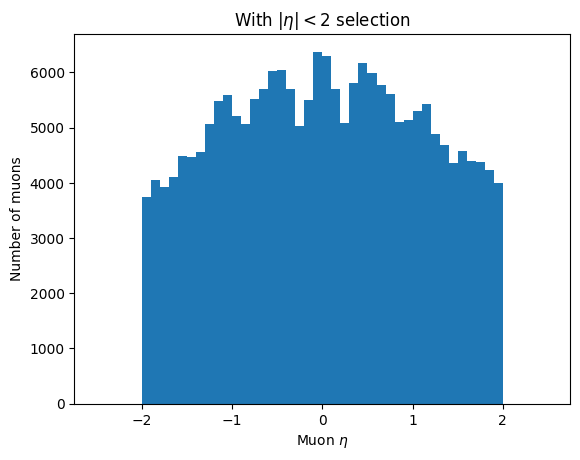

In [14]:
plt.hist(ak.flatten(branches['Muon_eta']), bins=50, range=(-2.5, 2.5))
plt.title('No selection')
plt.xlabel('Muon $\eta$')
plt.ylabel('Number of muons')
plt.show()

plt.hist(ak.flatten(branches['Muon_eta'][eta_mask]), bins=50, range=(-2.5, 2.5))
plt.title('With $|\eta| < 2$ selection')
plt.xlabel('Muon $\eta$')
plt.ylabel('Number of muons')
plt.show()

In [15]:
~single_muon_mask

<Array [True, True, False, True, ..., True, True, True] type='100000 * bool'>

In [16]:
single_muon_mask & eta_mask

<Array [[False, False], ..., [False, ..., False]] type='100000 * var * bool'>

In [17]:
single_muon_mask | eta_mask

<Array [[True, True], ..., [True, True, True]] type='100000 * var * bool'>

In [18]:
(branches['nMuon'] == 1) & (abs(branches['Muon_eta']) < 2)

<Array [[False, False], ..., [False, ..., False]] type='100000 * var * bool'>

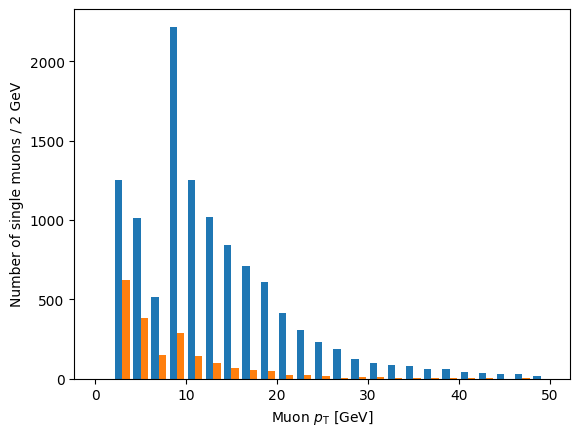

In [19]:
plt.hist([ak.flatten(branches['Muon_pt'][single_muon_mask & eta_mask]),
          ak.flatten(branches['Muon_pt'][single_muon_mask & ~eta_mask])],
         bins=25, range=(0, 50))
plt.xlabel('Muon $p_{\mathrm{T}}$ [GeV]')
plt.ylabel('Number of single muons / 2 GeV')
plt.show()

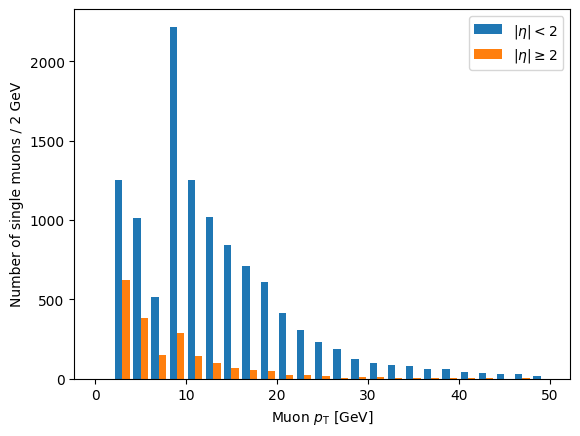

In [20]:
plt.hist([ak.flatten(branches['Muon_pt'][single_muon_mask & eta_mask]),
          ak.flatten(branches['Muon_pt'][single_muon_mask & ~eta_mask])],
         label=['$|\eta| < 2$', '$|\eta| \geq 2$'],
         bins=25, range=(0, 50))
plt.xlabel('Muon $p_{\mathrm{T}}$ [GeV]')
plt.ylabel('Number of single muons / 2 GeV')
plt.legend()
plt.show()

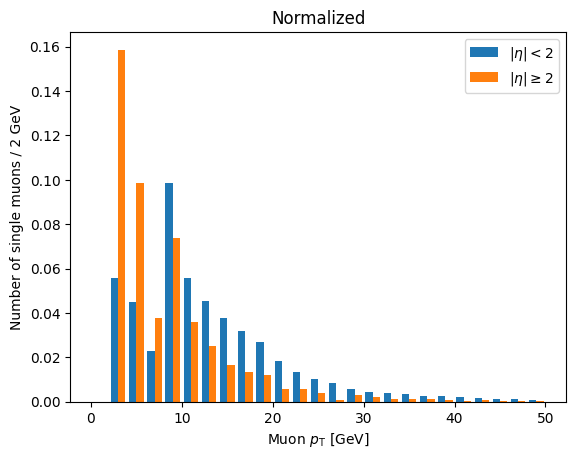

In [21]:
plt.hist([ak.flatten(branches['Muon_pt'][single_muon_mask & eta_mask]),
          ak.flatten(branches['Muon_pt'][single_muon_mask & ~eta_mask])],
         label=['$|\eta| < 2$', '$|\eta| \geq 2$'],
         bins=25, range=(0, 50), density=True)
plt.title('Normalized')
plt.xlabel('Muon $p_{\mathrm{T}}$ [GeV]')
plt.ylabel('Number of single muons / 2 GeV')
plt.legend()
plt.show()

In [22]:
%%time

eta_count = 0

for event in branches['Muon_eta']:
    for eta in event:
        if abs(eta) < 2:
            eta_count += 1

eta_count

CPU times: user 5.73 s, sys: 80.5 ms, total: 5.81 s
Wall time: 6.01 s


204564

In [23]:
%%time

np.sum(abs(branches['Muon_eta']) < 2)

CPU times: user 5 ms, sys: 1.25 ms, total: 6.25 ms
Wall time: 6.56 ms


204564